In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

In [2]:
preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
print(preDouble)

\\iobsdc01\SharedDocs\SEER_MEDICARE\SEER_MEDICARE_STAGING


In [3]:
import pickle
fileObject = open('control_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
controlindices = list(b)

In [4]:
import pickle
fileObject = open('treatment_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices = list(b)

In [5]:
dg = pd.read_pickle('goodindices_medpar.pickle')

In [6]:
dg.set_index('patient_id',inplace=True,drop=False)

In [7]:
def make_icd9sg_dataframe():
    """Make a dataframe that includes the icd9sg descriptins."""
    
    dficd9sg = pd.read_excel('CMS32_DESC_LONG_SHORT_SG.xlsx',
                        convert_float=False,
                        converters = {'PROCEDURE CODE': str})
    dficd9sg = dficd9sg.rename(columns={'PROCEDURE CODE': 'code',
                        'LONG DESCRIPTION': 'long_description',
                        'SHORT DESCRIPTION': 'short_description'})

    return dficd9sg

In [8]:
def make_icd9dx_dataframe():
    """Make a dataframe that includes the icd9dx descriptions."""
    
    dficd9dx = pd.read_excel('CMS32_DESC_LONG_SHORT_DX.xlsx',
                        convert_float=False,
                        converters = {'PROCEDURE CODE': str})
    dficd9dx = dficd9dx.rename(columns={'DIAGNOSIS CODE': 'code',
                                    'LONG DESCRIPTION': 'long_description',
                        'SHORT DESCRIPTION': 'short_description'})

    return dficd9dx

In [9]:

dficd9dx = make_icd9dx_dataframe()

In [10]:
dfcodes = dficd9dx.copy()
dfcodes = dfcodes.set_index('code',drop=False)
dfcodes

,code,long_description,short_description
code,,,
0010,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae
0011,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor
0019,0019,"Cholera, unspecified",Cholera NOS
0020,0020,Typhoid fever,Typhoid fever
0021,0021,Paratyphoid fever A,Paratyphoid fever a
0022,0022,Paratyphoid fever B,Paratyphoid fever b
0023,0023,Paratyphoid fever C,Paratyphoid fever c
0029,0029,"Paratyphoid fever, unspecified",Paratyphoid fever NOS
0030,0030,Salmonella gastroenteritis,Salmonella enteritis


In [11]:
code_dict = dfcodes.long_description.to_dict()
#code_dict

In [12]:
dficd9sg = make_icd9sg_dataframe()


In [13]:
dficd9sg = dficd9sg.set_index('code',drop=False)
dficd9sg


,code,long_description,short_description
code,,,
0001,0001,Therapeutic ultrasound of vessels of head and ...,Ther ult head & neck ves
0002,0002,Therapeutic ultrasound of heart,Ther ultrasound of heart
0003,0003,Therapeutic ultrasound of peripheral vascular ...,Ther ult peripheral ves
0009,0009,Other therapeutic ultrasound,Other therapeutic ultsnd
0010,0010,Implantation of chemotherapeutic agent,Implant chemothera agent
0011,0011,Infusion of drotrecogin alfa (activated),Infus drotrecogin alfa
0012,0012,Administration of inhaled nitric oxide,Adm inhal nitric oxide
0013,0013,Injection or infusion of nesiritide,Inject/infus nesiritide
0014,0014,Injection or infusion of oxazolidinone class o...,Injection oxazolidinone


In [14]:
proc_code_dict = dficd9sg.long_description.to_dict()

In [15]:

dg.head()


,registry,patient_id,age,stdstate,std_cnty,admday,dschgsta,ghopd,ppsind,provcode,...,obic,drgcode,discdest,outclrcde,primpayr,esrdcond,admsrce,admtype,admdxcde,deathadm
patient_id,,,,,,,,,,,,,,,,,,,,,
8832050314,88,8832050314,69,5,200,3,A,NaN,2,NaN,...,A,90,1,0,NaN,0,1,2,486,0
8832050314,88,8832050314,69,5,200,4,A,NaN,2,NaN,...,A,564,1,0,NaN,0,1,3,25062,0
4350001022,43,4350001022,69,19,30,4,B,NaN,2,NaN,...,A,296,20,0,NaN,0,7,1,27651,10
8813017394,88,8813017394,66,5,430,4,A,NaN,2,NaN,...,A,498,1,0,NaN,0,1,3,7384,0
8880066392,88,8880066392,86,5,120,3,A,NaN,2,NaN,...,A,350,3,0,NaN,0,7,1,5990,0


In [16]:
goodcols = ['patient_id','numdxcde','dgn_cd1','dgn_cd2','dgn_cd3',
            'dgn_cd4','dgn_cd5',
            'dgn_cd6','dgn_cd7','dgn_cd8','dgn_cd9',
            'dgn_cd10','dgn_cd11','dgn_cd12','dgn_cd13',
            'dgn_cd14','dgn_cd15','dgn_cd16','dgn_cd17',
            'dgn_cd18','dgn_cd19','dgn_cd20','dgn_cd21',
            'dgn_cd22','dgn_cd23','dgn_cd24','dgn_cd25',
            'srgcde1','srgcde2','srgcde3','srgcde4','srgcde5',
            'srgcde6','srgcde7','srgcde8','srgcde9','srgcde10',
            'srgcde11','srgcde12','srgcde13','srgcde14','srgcde15',
            'srgcde16','srgcde17','srgcde18','srgcde19','srgcde20',
            'srgcde21','srgcde22','srgcde23','srgcde24','srgcde25',
            'admdxcde','medpar_admission_date']
dg[goodcols].head()

,patient_id,numdxcde,dgn_cd1,dgn_cd2,dgn_cd3,dgn_cd4,dgn_cd5,dgn_cd6,dgn_cd7,dgn_cd8,...,srgcde18,srgcde19,srgcde20,srgcde21,srgcde22,srgcde23,srgcde24,srgcde25,admdxcde,medpar_admission_date
patient_id,,,,,,,,,,,,,,,,,,,,,
8832050314,8832050314,5,486,25000,3659,4019,72252,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486,10302006
8832050314,8832050314,9,7840,25062,30560,25052,3572,36201,4019,3659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25062,11212006
4350001022,4350001022,9,27651,2875,1629,1983,1960,2859,41401,412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27651,11072006
8813017394,8813017394,7,7384,72402,4019,V4365,27549,71230,60000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7384,11072006
8880066392,8880066392,7,6019,5997,V422,78820,59389,7993,V4501,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5990,9182006


In [17]:
dh = dg[goodcols].drop_duplicates().copy()

In [18]:
dh['dgn_cd1_description'] = dh['dgn_cd1'].astype('str').replace(code_dict)
dh['dgn_cd2_description'] = dh['dgn_cd2'].astype('str').replace(code_dict)
dh['dgn_cd3_description'] = dh['dgn_cd3'].astype('str').replace(code_dict)
dh['dgn_cd4_description'] = dh['dgn_cd4'].astype('str').replace(code_dict)
dh['dgn_cd5_description'] = dh['dgn_cd5'].astype('str').replace(code_dict)

dh['dgn_cd6_description'] = dh['dgn_cd6'].astype('str').replace(code_dict)
dh['dgn_cd7_description'] = dh['dgn_cd7'].astype('str').replace(code_dict)
dh['dgn_cd8_description'] = dh['dgn_cd8'].astype('str').replace(code_dict)
dh['dgn_cd9_description'] = dh['dgn_cd9'].astype('str').replace(code_dict)
dh['dgn_cd10_description'] = dh['dgn_cd10'].astype('str').replace(code_dict)
dh['dgn_cd11_description'] = dh['dgn_cd11'].astype('str').replace(code_dict)
dh['dgn_cd12_description'] = dh['dgn_cd12'].astype('str').replace(code_dict)
dh['dgn_cd13_description'] = dh['dgn_cd13'].astype('str').replace(code_dict)
dh['dgn_cd14_description'] = dh['dgn_cd14'].astype('str').replace(code_dict)
dh['dgn_cd15_description'] = dh['dgn_cd15'].astype('str').replace(code_dict)
dh['dgn_cd16_description'] = dh['dgn_cd16'].astype('str').replace(code_dict)
dh['dgn_cd17_description'] = dh['dgn_cd17'].astype('str').replace(code_dict)
dh['dgn_cd18_description'] = dh['dgn_cd18'].astype('str').replace(code_dict)
dh['dgn_cd19_description'] = dh['dgn_cd19'].astype('str').replace(code_dict)
dh['dgn_cd20_description'] = dh['dgn_cd20'].astype('str').replace(code_dict)

dh['dgn_cd21_description'] = dh['dgn_cd21'].astype('str').replace(code_dict)
dh['dgn_cd22_description'] = dh['dgn_cd22'].astype('str').replace(code_dict)
dh['dgn_cd23_description'] = dh['dgn_cd23'].astype('str').replace(code_dict)
dh['dgn_cd24_description'] = dh['dgn_cd24'].astype('str').replace(code_dict)
dh['dgn_cd25_description'] = dh['dgn_cd25'].astype('str').replace(code_dict)

In [19]:

dh['srgcde1_description'] = dh['srgcde1'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde2_description'] = dh['srgcde2'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde3_description'] = dh['srgcde3'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde4_description'] = dh['srgcde4'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde5_description'] = dh['srgcde5'].fillna(0).astype('int').astype('str').replace(proc_code_dict)


dh['srgcde6_description'] = dh['srgcde6'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde7_description'] = dh['srgcde7'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde8_description'] = dh['srgcde8'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde9_description'] = dh['srgcde9'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde10_description'] = dh['srgcde10'].fillna(0).astype('int').astype('str').replace(proc_code_dict)


dh['srgcde11_description'] = dh['srgcde11'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde12_description'] = dh['srgcde12'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde13_description'] = dh['srgcde13'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde14_description'] = dh['srgcde14'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde15_description'] = dh['srgcde15'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde16_description'] = dh['srgcde16'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde17_description'] = dh['srgcde17'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde18_description'] = dh['srgcde18'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde19_description'] = dh['srgcde19'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde20_description'] = dh['srgcde20'].fillna(0).astype('int').astype('str').replace(proc_code_dict)


dh['srgcde21_description'] = dh['srgcde21'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde22_description'] = dh['srgcde22'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde23_description'] = dh['srgcde23'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde24_description'] = dh['srgcde24'].fillna(0).astype('int').astype('str').replace(proc_code_dict)
dh['srgcde25_description'] = dh['srgcde25'].fillna(0).astype('int').astype('str').replace(proc_code_dict)

In [20]:
dh['admdxcde_description'] = dh['admdxcde'].astype('str').replace(code_dict)

In [21]:
df = pd.read_pickle('dfpedsfFirsts.pickle')

# <font color="#E56717">Complications in the Hospital Claims data</font>

* <span style="font-size:1.5em;">MedPAR: Medicare Provider and Review</span>
* <span style="font-size:1.5em;">One record per stay</span>
* <span style="font-size:1.5em;">Key elements: admission and discharge diagnoses and dates, procedures and procedure dates, revenue center codes for ER</span>

In [22]:
df = df.set_index('patient_id',drop=False)

In [24]:
goodindices = controlindices + treatmentindices
print(len(goodindices),len(controlindices),len(treatmentindices))

2110 1055 1055


In [25]:
df_all_good_indices = df.loc[goodindices].copy()

In [26]:
del df

In [27]:
monthdict = {'Jan': '01',
            'Feb': '02',
            'Mar': '03',
            'Apr': '04',
            'May': '05',
            'Jun': '06',
            'Jul': '07',
            'Aug': '08',
            'Sep': '09',
            'Oct': '10',
            'Nov': '11',
            'Dec': '12'}


df_all_good_indices['month1'] = df_all_good_indices['modx1'].replace(monthdict)

# <font color="#E56717">We need to only keep claims for which the date of admission is later in time than the cancer diagnosis date</font>


<span style="font-size:1.5em;">3 of the treatment-control pairs are missing month of diagnoses; will not use them when investigating relative likelihood of complications in the MedPAR file</span>

<span style="font-size:1.5em;">Likewise, some 970 rows in the MedPAR file had missing admission date information; will not use them either.</span>

$\rightarrow$ <span style="font-size:1.5em;">2696 unique claims for patients in the PBT and RT (Non PBT) groups, with an admission date later than the cancer dx date</span>

In [28]:
d_t_c = dict(zip(treatmentindices, controlindices))
d_c_t = dict(zip(controlindices, treatmentindices))


treatmentindices[0] in d_t_c

True

In [29]:

bad_month_indices_filter = df_all_good_indices['month1'].isnull()

to_drop = list(df_all_good_indices[bad_month_indices_filter].month1.index)
print(to_drop)

['8871012452', '8850026350', '8887019249', '8843057443', '8860084330', '8840093440']


In [30]:
for i in (3,4,5):
    del d_t_c[to_drop[i]]

In [31]:
goodtreatmentindices = d_t_c.keys()
goodcontrolindices = d_t_c.values()
print(len(goodtreatmentindices), len(goodcontrolindices))

1052 1052


In [33]:
df_all_good_indices = df_all_good_indices.loc[list(goodcontrolindices) + list(goodtreatmentindices)]

#df_all_good_indices['month1'].isnull().sum() # should be zero now

In [34]:
df_all_good_indices['yrdx_plus_modx'] = df_all_good_indices.yrdx1.astype('str') + df_all_good_indices.month1.astype('str')


df_all_good_indices['yrdx_plus_modx'] = pd.to_datetime(df_all_good_indices['yrdx_plus_modx'], 
                                                      format='%Y%m')

In [35]:
dh = dh.loc[df_all_good_indices.index]

dh['yrdx_plus_modx'] = df_all_good_indices['yrdx_plus_modx']
dh['site1'] = df_all_good_indices['site1']

In [36]:
dh['medpar_admission_date_new'] = dh.medpar_admission_date.astype('str').str.replace('\.0','')
dh['medpar_admission_date_new'] = dh.medpar_admission_date_new.str.rjust(8,'0')

In [37]:
dh = dh[~dh['medpar_admission_date_new'].str.contains('nan',case=False)]
dh.shape

(3309, 108)

In [38]:
dh['medpar_admission_date_new'] = pd.to_datetime(dh['medpar_admission_date_new'], 
                                                      format='%m%d%Y').copy()

In [39]:
dh = dh[(dh.medpar_admission_date_new >= dh.yrdx_plus_modx)]
dh.shape

(2696, 108)

# <font color="#E56717">There are up to 25 + 1 different icd-9-cm dx codes associated with each claim</font>

<span style="font-size:1.5em;">The most common icd9 dx codes in the medpar claims: (raw counts)</span>

In [40]:
control_code_1 = dh['dgn_cd1_description'].loc[goodcontrolindices].value_counts()
treatment_code_1 = dh['dgn_cd1_description'].loc[goodtreatmentindices].value_counts()

control_code_2 = dh['dgn_cd2_description'].loc[goodcontrolindices].value_counts()
treatment_code_2 = dh['dgn_cd2_description'].loc[goodtreatmentindices].value_counts()

control_code_3 = dh['dgn_cd3_description'].loc[goodcontrolindices].value_counts()
treatment_code_3 = dh['dgn_cd3_description'].loc[goodtreatmentindices].value_counts()

control_code_4 = dh['dgn_cd4_description'].loc[goodcontrolindices].value_counts()
treatment_code_4 = dh['dgn_cd4_description'].loc[goodtreatmentindices].value_counts()


control_code_5 = dh['dgn_cd5_description'].loc[goodcontrolindices].value_counts()
treatment_code_5 = dh['dgn_cd5_description'].loc[goodtreatmentindices].value_counts()


control_code_6 = dh['dgn_cd6_description'].loc[goodcontrolindices].value_counts()
treatment_code_6 = dh['dgn_cd6_description'].loc[goodtreatmentindices].value_counts()


control_code_7 = dh['dgn_cd7_description'].loc[goodcontrolindices].value_counts()
treatment_code_7 = dh['dgn_cd7_description'].loc[goodtreatmentindices].value_counts()


control_code_8 = dh['dgn_cd8_description'].loc[goodcontrolindices].value_counts()
treatment_code_8 = dh['dgn_cd8_description'].loc[goodtreatmentindices].value_counts()



control_code_9 = dh['dgn_cd9_description'].loc[goodcontrolindices].value_counts()
treatment_code_9 = dh['dgn_cd9_description'].loc[goodtreatmentindices].value_counts()


control_code_10 = dh['dgn_cd10_description'].loc[goodcontrolindices].value_counts()
treatment_code_10 = dh['dgn_cd10_description'].loc[goodtreatmentindices].value_counts()

##################################################################################################

control_code_11 = dh['dgn_cd11_description'].loc[goodcontrolindices].value_counts()
treatment_code_11 = dh['dgn_cd11_description'].loc[goodtreatmentindices].value_counts()

control_code_12 = dh['dgn_cd12_description'].loc[goodcontrolindices].value_counts()
treatment_code_12 = dh['dgn_cd12_description'].loc[goodtreatmentindices].value_counts()

control_code_13 = dh['dgn_cd13_description'].loc[goodcontrolindices].value_counts()
treatment_code_13 = dh['dgn_cd13_description'].loc[goodtreatmentindices].value_counts()

control_code_14 = dh['dgn_cd14_description'].loc[goodcontrolindices].value_counts()
treatment_code_14 = dh['dgn_cd14_description'].loc[goodtreatmentindices].value_counts()


control_code_15 = dh['dgn_cd15_description'].loc[goodcontrolindices].value_counts()
treatment_code_15 = dh['dgn_cd15_description'].loc[goodtreatmentindices].value_counts()


control_code_16 = dh['dgn_cd16_description'].loc[goodcontrolindices].value_counts()
treatment_code_16 = dh['dgn_cd16_description'].loc[goodtreatmentindices].value_counts()


control_code_17 = dh['dgn_cd17_description'].loc[goodcontrolindices].value_counts()
treatment_code_17 = dh['dgn_cd17_description'].loc[goodtreatmentindices].value_counts()


control_code_18 = dh['dgn_cd18_description'].loc[goodcontrolindices].value_counts()
treatment_code_18 = dh['dgn_cd18_description'].loc[goodtreatmentindices].value_counts()



control_code_19 = dh['dgn_cd19_description'].loc[goodcontrolindices].value_counts()
treatment_code_19 = dh['dgn_cd19_description'].loc[goodtreatmentindices].value_counts()


control_code_20 = dh['dgn_cd20_description'].loc[goodcontrolindices].value_counts()
treatment_code_20 = dh['dgn_cd20_description'].loc[goodtreatmentindices].value_counts()


control_code_21 = dh['dgn_cd21_description'].loc[goodcontrolindices].value_counts()
treatment_code_21 = dh['dgn_cd21_description'].loc[goodtreatmentindices].value_counts()

control_code_22 = dh['dgn_cd22_description'].loc[goodcontrolindices].value_counts()
treatment_code_22 = dh['dgn_cd22_description'].loc[goodtreatmentindices].value_counts()



control_code_23 = dh['dgn_cd23_description'].loc[goodcontrolindices].value_counts()
treatment_code_23 = dh['dgn_cd23_description'].loc[goodtreatmentindices].value_counts()


control_code_24 = dh['dgn_cd24_description'].loc[goodcontrolindices].value_counts()
treatment_code_24 = dh['dgn_cd24_description'].loc[goodtreatmentindices].value_counts()


control_code_25 = dh['dgn_cd25_description'].loc[goodcontrolindices].value_counts()
treatment_code_25 = dh['dgn_cd25_description'].loc[goodtreatmentindices].value_counts()


control_code_admdxcde = dh['admdxcde_description'].loc[goodcontrolindices].value_counts()
treatment_code_admdxcde = dh['admdxcde_description'].loc[goodtreatmentindices].value_counts()










In [42]:
dfkodes = pd.DataFrame({'control_code_1': control_code_1,
                        'control_code_2': control_code_2,
                        'control_code_3': control_code_3,
                        'control_code_4': control_code_4,
                        'control_code_5': control_code_5,
                        'control_code_6': control_code_6,
                        'control_code_7': control_code_7,
                        'control_code_8': control_code_8,
                        'control_code_9': control_code_9,
                        'control_code_10': control_code_10,
                        'treatment_code_1': treatment_code_1,
                        'treatment_code_2': treatment_code_2,
                        'treatment_code_3': treatment_code_3,
                        'treatment_code_4': treatment_code_4,
                        'treatment_code_5': treatment_code_5,
                        'treatment_code_6': treatment_code_6,
                        'treatment_code_7': treatment_code_7,
                        'treatment_code_8': treatment_code_8,
                        'treatment_code_9': treatment_code_9,
                        'treatment_code_10': treatment_code_10,
                        'control_code_11': control_code_11,
                        'control_code_12': control_code_12,
                        'control_code_13': control_code_13,
                        'control_code_14': control_code_14,
                        'control_code_15': control_code_15,
                        'control_code_16': control_code_16,
                        'control_code_17': control_code_17,
                        'control_code_18': control_code_18,
                        'control_code_19': control_code_19,
                        'control_code_20': control_code_20,
                        'treatment_code_11': treatment_code_11,
                        'treatment_code_12': treatment_code_12,
                        'treatment_code_13': treatment_code_13,
                        'treatment_code_14': treatment_code_14,
                        'treatment_code_15': treatment_code_15,
                        'treatment_code_16': treatment_code_16,
                        'treatment_code_17': treatment_code_17,
                        'treatment_code_18': treatment_code_18,
                        'treatment_code_19': treatment_code_19,
                        'treatment_code_20': treatment_code_20,
                        'control_code_21': control_code_21,
                        'control_code_22': control_code_22,
                        'control_code_23': control_code_23,
                        'control_code_24': control_code_24,
                        'control_code_25': control_code_25,
                         'treatment_code_21': treatment_code_21,
                        'treatment_code_22': treatment_code_22,
                        'treatment_code_23': treatment_code_23,
                        'treatment_code_24': treatment_code_24,
                        'treatment_code_25': treatment_code_25,
                        'control_code_admdxcde': control_code_admdxcde,
                        'treatment_code_admdxcde': treatment_code_admdxcde
                       })

In [48]:
dfkodes['control_code'] = dfkodes[['control_code_1',
                                  'control_code_2',
                                  'control_code_3',
                                  'control_code_4',
                                  'control_code_5',
                                  'control_code_6',
                                  'control_code_7',
                                  'control_code_8',
                                  'control_code_9',
                                  'control_code_10',
                                   'control_code_11',
                                  'control_code_12',
                                  'control_code_13',
                                  'control_code_14',
                                  'control_code_15',
                                  'control_code_16',
                                  'control_code_17',
                                  'control_code_18',
                                  'control_code_19',
                                  'control_code_20',
                                    'control_code_21',
                                  'control_code_22',
                                  'control_code_23',
                                  'control_code_24',
                                  'control_code_25',
                                   'control_code_admdxcde'
                                  ]].sum(axis=1)

In [49]:
dfkodes['treatment_code'] = dfkodes[['treatment_code_1',
                                  'treatment_code_2',
                                  'treatment_code_3',
                                  'treatment_code_4',
                                  'treatment_code_5',
                                  'treatment_code_6',
                                  'treatment_code_7',
                                  'treatment_code_8',
                                  'treatment_code_9',
                                  'treatment_code_10',
                                   'treatment_code_11',
                                  'treatment_code_12',
                                  'treatment_code_13',
                                  'treatment_code_14',
                                  'treatment_code_15',
                                  'treatment_code_16',
                                  'treatment_code_17',
                                  'treatment_code_18',
                                  'treatment_code_19',
                                  'treatment_code_20',
                                    'treatment_code_21',
                                  'treatment_code_22',
                                  'treatment_code_23',
                                  'treatment_code_24',
                                  'treatment_code_25',
                                   'treatment_code_admdxcde'
                                  ]].sum(axis=1)

In [50]:
dfkodes['difference'] = np.abs(dfkodes.control_code - dfkodes.treatment_code)
dfkodes['together'] = dfkodes.control_code + dfkodes.treatment_code
dfkodes = dfkodes.sort_values(['together','difference'],ascending=False)

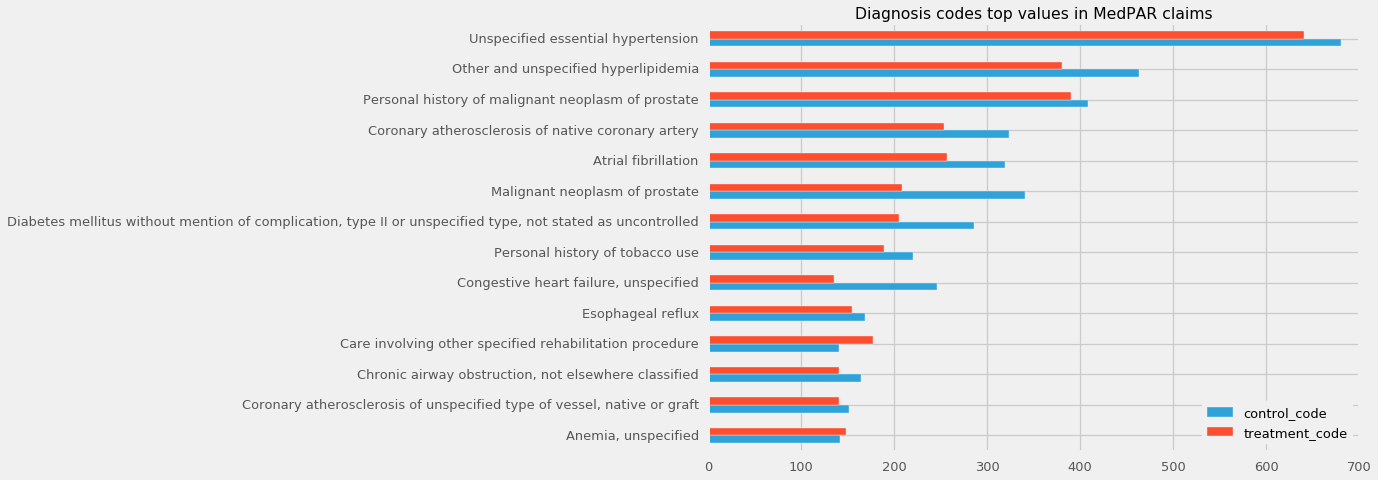

In [105]:
dfkodes[['control_code','treatment_code']].iloc[1:15][::-1].plot(kind='barh',
                title="Diagnosis codes top values in MedPAR claims");

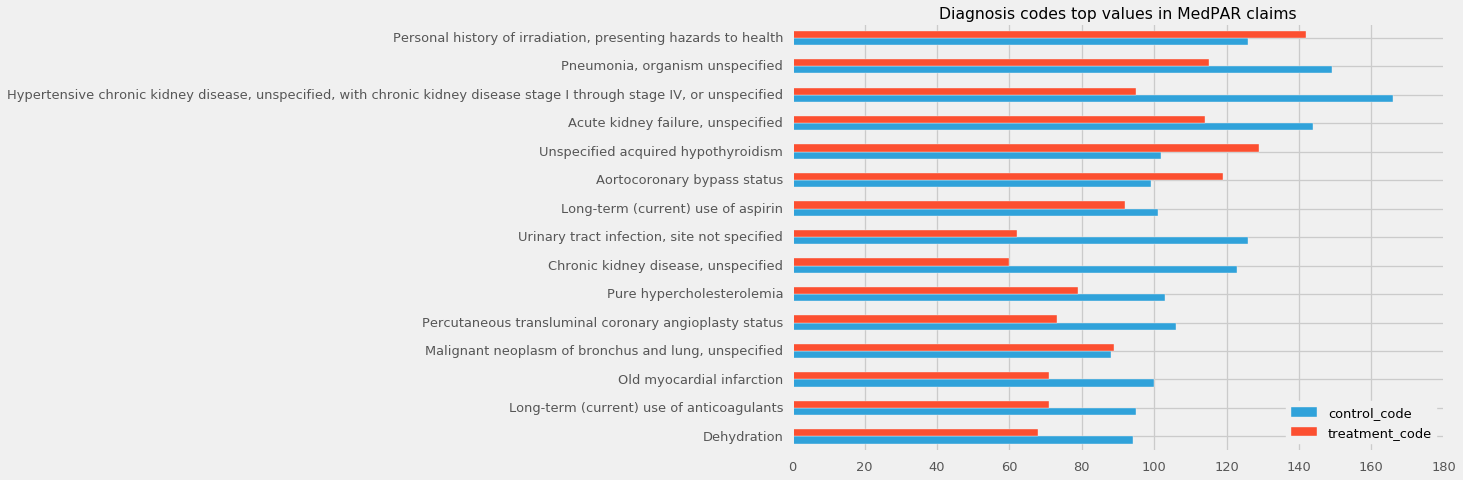

In [117]:
dfkodes[['control_code','treatment_code']].iloc[15:30][::-1].plot(kind='barh',
                title="Diagnosis codes top values in MedPAR claims");

In [54]:
searchcols = list(dh.columns)[54:79]
searchcols.append(dh.columns[104])
searchcols

['dgn_cd1_description',
 'dgn_cd2_description',
 'dgn_cd3_description',
 'dgn_cd4_description',
 'dgn_cd5_description',
 'dgn_cd6_description',
 'dgn_cd7_description',
 'dgn_cd8_description',
 'dgn_cd9_description',
 'dgn_cd10_description',
 'dgn_cd11_description',
 'dgn_cd12_description',
 'dgn_cd13_description',
 'dgn_cd14_description',
 'dgn_cd15_description',
 'dgn_cd16_description',
 'dgn_cd17_description',
 'dgn_cd18_description',
 'dgn_cd19_description',
 'dgn_cd20_description',
 'dgn_cd21_description',
 'dgn_cd22_description',
 'dgn_cd23_description',
 'dgn_cd24_description',
 'dgn_cd25_description',
 'admdxcde_description']

In [146]:
dfkodes['control_code'][dfkodes['control_code'].index.str.contains('atrial',case=False,na=False)]

Atrial fibrillation                          319.0
Atrial flutter                                42.0
Sinoatrial node dysfunction                   20.0
Ostium secundum type atrial septal defect      1.0
Name: control_code, dtype: float64

# <font color="#E56717">Determine the relative likelihood of experiencing certain complications, and whether or not any observed differences are statistically significant</font>

<span style="font-size:1.5em;">For each matched - pair, get an indicator variable for whether or not they had a claim in the medpar file with the particular code of interest anywhere in the potentially 25 + 1 icd9 dx columns. It doesn't matter if it appears in more than one claim: either a 1 or 0.</span>

In [56]:
def make_filter(pid, df, condition):
    """pid is a patient_id, df is a dataframe, and condition
    is the string. Returns a boolean of whether or not any of the 
    columns searchcols in df.loc[pid] as strings contain condition."""
    
    if pid not in df.index:
        check_dict = dict()
        check_dict[pid] = 0
        return check_dict
    
    dh = df.loc[pid].copy()
    
    if type(dh) == pd.core.series.Series:
        dh = pd.DataFrame(dh).transpose().copy()
        
    
    f0 = dh[searchcols[0]].str.contains(condition,case=False,na=False)
    f1 = dh[searchcols[1]].str.contains(condition,case=False,na=False)
    f2 = dh[searchcols[2]].str.contains(condition,case=False,na=False)
    f3 = dh[searchcols[3]].str.contains(condition,case=False,na=False)
    f4 = dh[searchcols[4]].str.contains(condition,case=False,na=False)
    f5 = dh[searchcols[5]].str.contains(condition,case=False,na=False)
    f6 = dh[searchcols[6]].str.contains(condition,case=False,na=False)
    f7 = dh[searchcols[7]].str.contains(condition,case=False,na=False)
    f8 = dh[searchcols[8]].str.contains(condition,case=False,na=False)
    f9 = dh[searchcols[9]].str.contains(condition,case=False,na=False)
    f10 = dh[searchcols[10]].str.contains(condition,case=False,na=False)
    f11 = dh[searchcols[11]].str.contains(condition,case=False,na=False)
    f12 = dh[searchcols[12]].str.contains(condition,case=False,na=False)
    f13 = dh[searchcols[13]].str.contains(condition,case=False,na=False)
    f14 = dh[searchcols[14]].str.contains(condition,case=False,na=False)
    f15 = dh[searchcols[15]].str.contains(condition,case=False,na=False)
    f16 = dh[searchcols[16]].str.contains(condition,case=False,na=False)
    f17 = dh[searchcols[17]].str.contains(condition,case=False,na=False)
    f18 = dh[searchcols[18]].str.contains(condition,case=False,na=False)
    f19 = dh[searchcols[19]].str.contains(condition,case=False,na=False)
    f20 = dh[searchcols[20]].str.contains(condition,case=False,na=False)
    f21 = dh[searchcols[21]].str.contains(condition,case=False,na=False)
    f22 = dh[searchcols[22]].str.contains(condition,case=False,na=False)
    f23 = dh[searchcols[23]].str.contains(condition,case=False,na=False)
    f24 = dh[searchcols[24]].str.contains(condition,case=False,na=False)
    f25 = dh[searchcols[25]].str.contains(condition,case=False,na=False)
    
    bigcheck = f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 | f9 | f10 | \
               f11 | f12 | f13 | f14 | f15 | f16 | f17 | f18 | f19 | \
              f20 | f21 | f22 | f23 | f24 | f25
            
    check_dict = dict()
    #print(bigcheck.astype('int'))
    #print(type(bigcheck))
    check_dict[pid] = bigcheck.astype('int').max()
    #print(check_dict)
    return check_dict

In [147]:
from collections import OrderedDict
chronickidneycontrol = OrderedDict()

for i in range(len(list(goodcontrolindices))):
    little_guy = make_filter(list(goodcontrolindices)[i], dh[searchcols], 'atrial')
    chronickidneycontrol[list(goodcontrolindices)[i]] = little_guy[list(goodcontrolindices)[i]]


In [148]:
from collections import OrderedDict
chronickidneytreatment = OrderedDict()

for i in range(len(list(goodtreatmentindices))):
    little_guy = make_filter(list(goodtreatmentindices)[i], dh[searchcols], 'atrial')
    chronickidneytreatment[list(goodtreatmentindices)[i]] = little_guy[list(goodtreatmentindices)[i]]

In [149]:

q = list(chronickidneycontrol.items())

controlchronickidneyvals = [q[p][1] for p in range(len(list(chronickidneycontrol.items())))]

controlchronickidneyindex = [q[p][0] for p in range(len(list(chronickidneycontrol.items())))]

In [150]:
q = list(chronickidneytreatment.items())

treatmentchronickidneyvals = [q[p][1] for p in range(len(list(chronickidneytreatment.items())))]

treatmentchronickidneyindex = [q[p][0] for p in range(len(list(chronickidneytreatment.items())))]

In [151]:
dfchronickidney = pd.DataFrame({'control_vals': controlchronickidneyvals,
                               'control_ids': controlchronickidneyindex,
                               'treatment_vals': treatmentchronickidneyvals,
                               'treatment_ids': treatmentchronickidneyindex})

# <font color="#E56717">Computed an indicator variable for whether or not a given patient had any dx code in the MedPAR file with "kidney" as part of the description; collapsed some codes together</font>

In [152]:
dfchronickidney.describe()

,control_vals,treatment_vals
count,1052.000000,1052.000000
mean,0.113118,0.116920
std,0.316887,0.321478
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [153]:
from scipy.stats import ranksums, wilcoxon

t, p = wilcoxon(dfchronickidney.control_vals.as_matrix(),
               dfchronickidney.treatment_vals.as_matrix())

print(t,p)

10659.0 0.781511294999


# <font color="#E56717">Also test for signficance of the difference in the probability of a "kidney" icd9-dx code in a hospital stay using Bayesian A/B testing</font>

In [154]:
probcontrol = dfchronickidney.control_vals.sum()/1052
probtreatment = dfchronickidney.treatment_vals.sum()/1052
print(probcontrol,probtreatment)


0.11311787072243346 0.11692015209125475


In [155]:
controltotal = 1052
treatmenttotal = 1052
controluninsured = dfchronickidney.control_vals.sum()
treatmentuninsured = dfchronickidney.treatment_vals.sum()

In [156]:
TREATMENT_UNINSURED = treatmentuninsured
CONTROL_UNINSURED = controluninsured
TREATMENT_TOTAL = treatmenttotal
CONTROL_TOTAL = controltotal
from scipy.stats import beta
alpha_prior = 1
beta_prior = 1
posterior_treatment = beta(alpha_prior + TREATMENT_UNINSURED, beta_prior + TREATMENT_TOTAL - TREATMENT_UNINSURED)
posterior_control = beta(alpha_prior + CONTROL_UNINSURED, beta_prior + CONTROL_TOTAL - CONTROL_UNINSURED)
samples = 2000000
samples_posterior_treatment = posterior_treatment.rvs(samples)
samples_posterior_control = posterior_control.rvs(samples)
(samples_posterior_treatment > samples_posterior_control).mean()

0.60763350000000005

(0, 0.5)

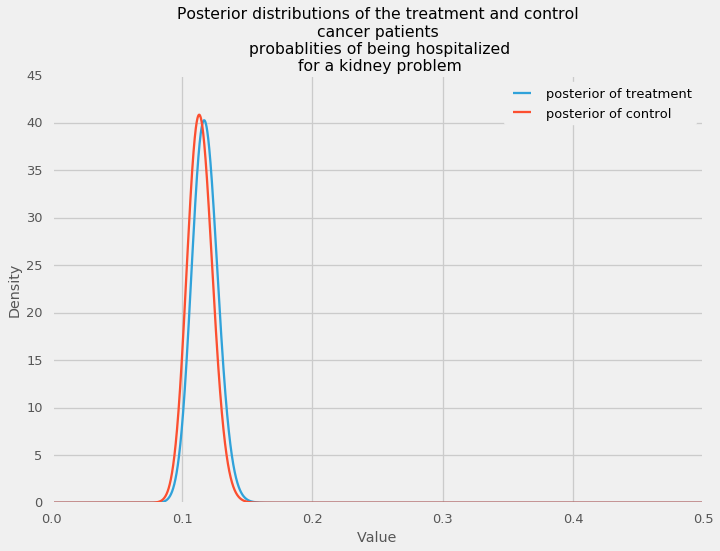

In [157]:
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_treatment.pdf(x), label='posterior of treatment')
plt.plot(x, posterior_control.pdf(x), label='posterior of control');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of the treatment and control
cancer patients\n probablities of being hospitalized\n for a kidney problem""")
plt.legend();
plt.xlim(0,.5)